# Suitability Function

`SuitabilityFunction` is used to convert indicator to suitability values. *LSAPy* support two types of suitability function: discrete function and membership function.

In [11]:
# import libraries
from lsapy import SuitabilityFunction
# alternatively, you can import the class from the function module
# from lsapy.function import SuitabilityFunction

## Discrete Suitability Function

The simplest case! Discrete function is used to convert discrete indicator values to suitability. Thus, the computation is quite straight forward and we simply attribute a suitability value to each categorical value. This is done by providing the rules as parameter of the function and where rules is a `dict` with the indicator value as key and the associated suitability as value.  
Below is an example:

In [12]:
x = [1, 2, 3, 4, 5]  # discrete indicator values
rules = {1: 0, 2: 0, 3: 0.2, 4: 0.6, 5: 1}  # suitability values

func = SuitabilityFunction(name="discrete", params={"rules": rules})  # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

`str` type indicators values is also supported.

In [13]:
x = ["1", "2", "3", "4", "5"]  # discrete indicator values
rules = {"1": 0, "2": 0, "3": 0.2, "4": 0.6, "5": 1}  # suitability values

func = SuitabilityFunction(name="discrete", params={"rules": rules})  # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

## Membership Suitability Function

Membership functions are a bit more complex and are used to convert continuous indicators to suitability using a fuzzy-logic approach. Several membership functions are available allowing flexibility in the shape of the curve desired. The list of all implemented membership functions can be found [here](../api/index.rst).


The first step is thus to determine which function we should use and with which parameters. The `fit_membership` function can be used to find the best membership function. Let's say we have indicator value ranging from 750 to 2000 and we know that suitability values of 0, 0.25, 0.5, 0.75, 1 correspond respectively to 1000, 1150, 1250, 1350, 1500. We can use this information to fit membership functions and determine which one it the best.

In [14]:
from lsapy.functions.membership import fit_membership

fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1])

C:\Users\Baptiste\AppData\Local\Temp\ipykernel_7508\123122126.py:2: UserWarning: No parameters to determine for `sigmoid`. Skipped.
  fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1])
C:\Users\Baptiste\Documents\EtudesSup\PhD-UC\GitHub\lsapy\src\lsapy\functions\membership.py:187: RuntimeWarning: invalid value encountered in power
  return np.exp(-a * np.power(x - b, c))
C:\Users\Baptiste\AppData\Local\Temp\ipykernel_7508\123122126.py:2: UserWarning: Failed to fit `vetharaniam2024_eq8`. Skipped.
  fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1])
C:\Users\Baptiste\Documents\EtudesSup\PhD-UC\GitHub\lsapy\src\lsapy\functions\membership.py:225: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(a * np.power(np.power(x, c) - np.power(b, c), 2)))
C:\Users\Baptiste\Documents\EtudesSup\PhD-UC\GitHub\lsapy\src\lsapy\functions\membership.py:281: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = c

(<function lsapy.functions.membership.vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

The result of the fit says that best membership function is 'vetharaniam2022_eq5' with the parameters a=-0.876 and b=1248.  
We can also plot and print the results of the fitting for a better understanding with `plot=True` and `verbose=True` respectively.

C:\Users\Baptiste\AppData\Local\Temp\ipykernel_7508\383407629.py:1: UserWarning: No parameters to determine for `sigmoid`. Skipped.
  fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1], plot=True, verbose=True)
C:\Users\Baptiste\AppData\Local\Temp\ipykernel_7508\383407629.py:1: UserWarning: Failed to fit `vetharaniam2024_eq8`. Skipped.
  fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1], plot=True, verbose=True)


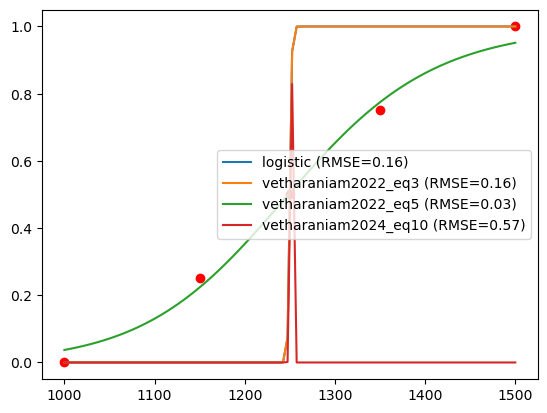


Best fit: vetharaniam2022_eq5
RMSE: 0.03187
Params: a=-0.875896889227584, b=1248.439341046477



(<function lsapy.functions.membership.vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

In [15]:
fit_membership(x=[1000, 1150, 1250, 1350, 1500], y=[0, 0.25, 0.5, 0.75, 1], plot=True, verbose=True)

We can now use the results of the fitting to convert indicator value into suitability.

In [16]:
import numpy as np

func = SuitabilityFunction(name="vetharaniam2022_eq5", params={"a": -0.876, "b": 1248})
x = np.linspace(750, 2000, 100)  # indicator values: create a array of 100 values between 750 and 2000
func(x)

array([9.5176324e-04, 1.1635135e-03, 1.4199546e-03, 1.7300220e-03,
       2.1043362e-03, 2.5554982e-03, 3.0984317e-03, 3.7507790e-03,
       4.5333509e-03, 5.4706451e-03, 6.5914313e-03, 7.9294061e-03,
       9.5239300e-03, 1.1420826e-02, 1.3673263e-02, 1.6342668e-02,
       1.9499702e-02, 2.3225209e-02, 2.7611116e-02, 3.2761227e-02,
       3.8791765e-02, 4.5831595e-02, 5.4021928e-02, 6.3515328e-02,
       7.4473821e-02, 8.7065808e-02, 1.0146171e-01, 1.1782788e-01,
       1.3631900e-01, 1.5706876e-01, 1.8017919e-01, 2.0570910e-01,
       2.3366249e-01, 2.6397806e-01, 2.9652125e-01, 3.3107966e-01,
       3.6736408e-01, 4.0501490e-01, 4.4361451e-01, 4.8270488e-01,
       5.2180916e-01, 5.6045455e-01, 5.9819460e-01, 6.3462907e-01,
       6.6941839e-01, 7.0229357e-01, 7.3305970e-01, 7.6159453e-01,
       7.8784293e-01, 8.1180829e-01, 8.3354247e-01, 8.5313523e-01,
       8.7070388e-01, 8.8638395e-01, 9.0032142e-01, 9.1266620e-01,
       9.2356694e-01, 9.3316752e-01, 9.4160432e-01, 9.4900465e

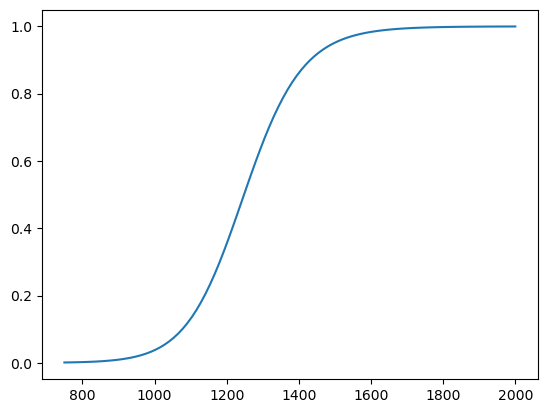

In [17]:
func.plot(x)